#  K-평균 군집분류(K-Means Clustering) 개념 정리

## 1. 개념
- **K-Means**는 데이터를 **K개의 그룹(클러스터)**로 자동 분류하는 **비지도 학습 알고리즘**  
- 각 그룹은 **비슷한 특성**을 가진 데이터끼리 모여 형성됨
- **중심점(centroid)**을 기준으로 데이터를 나누고, 중심점이 안정될 때까지 반복

---

## 2. 동작 원리
1. **K값 설정**  
   - 만들고 싶은 그룹 수를 미리 정함 (예: K=3 → 3개의 그룹)
2. **중심점 초기화**  
   - 랜덤하게 K개의 중심점을 선택
3. **할당(Assignment)**  
   - 각 데이터 → 가장 가까운 중심점에 할당
4. **중심점 갱신(Update)**  
   - 각 그룹의 평균 좌표로 중심점을 이동
5. **반복**  
   - 중심점 변화가 없거나 변화가 매우 작아질 때까지 3~4단계 반복

---

## 3. 특징
| 특징 | 설명 |
|------|------|
| 알고리즘 유형 | 비지도 학습 (Unsupervised Learning) |
| 거리 측정 | 주로 **유클리드 거리** 사용 |
| 장점 | 구현이 간단하고 빠름 |
| 단점 | K값을 미리 정해야 함, 이상치에 민감함 |
| 결과 | 각 데이터가 속한 클러스터 번호와 클러스터 중심점 |

---

## 4. 장단점
###  장점
- 계산이 빠르고 간단함
- 대용량 데이터에도 적용 가능
- 결과 해석이 직관적

###  단점
- K값을 미리 알아야 함
- 이상치(Outlier)에 민감
- 구형(球形) 군집에 적합, 복잡한 형태의 데이터엔 한계

---

## 5. 예시
 **"K=3인 경우"**
- 데이터: 학생 키와 몸무게
- 결과:  
  1. **저체중 그룹**
  2. **평균 그룹**
  3. **운동선수 그룹**

---

## 6. 시각적 이해


In [1]:
import pandas as pd
import numpy as np
import mglearn
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

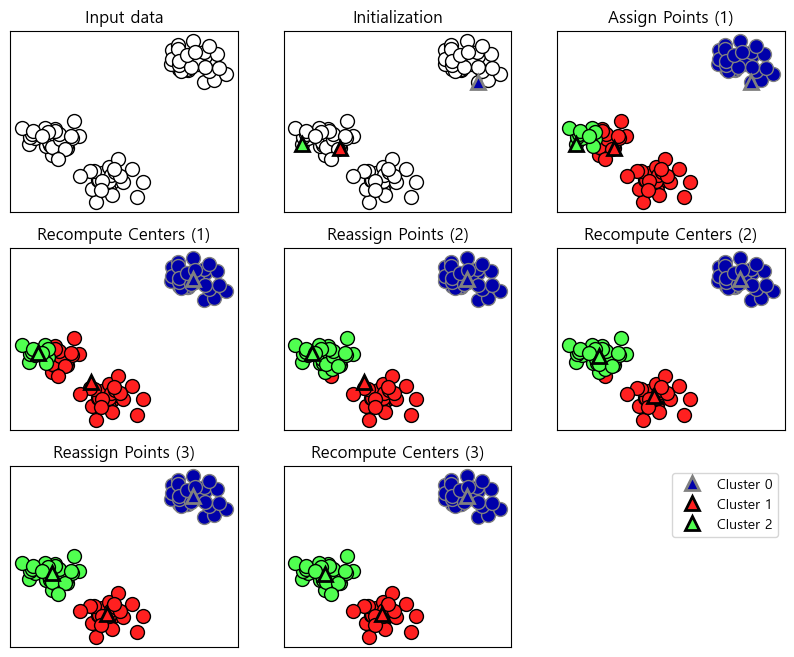

In [2]:
mglearn.plots.plot_kmeans_algorithm()

In [5]:
df = pd.read_csv('data/kmean.csv', index_col='Unnamed: 0')
df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


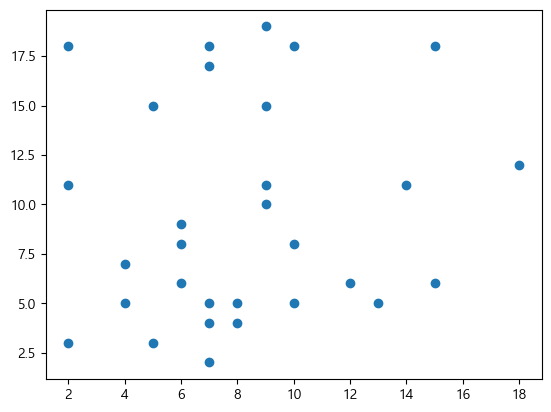

In [6]:
plt.scatter( df['x'], df['y'])
plt.show()

In [7]:
df.values

array([[ 2,  3],
       [ 2, 11],
       [ 2, 18],
       [ 4,  5],
       [ 4,  7],
       [ 5,  3],
       [ 5, 15],
       [ 6,  6],
       [ 6,  8],
       [ 6,  9],
       [ 7,  2],
       [ 7,  4],
       [ 7,  5],
       [ 7, 17],
       [ 7, 18],
       [ 8,  5],
       [ 8,  4],
       [ 9, 10],
       [ 9, 11],
       [ 9, 15],
       [ 9, 19],
       [10,  5],
       [10,  8],
       [10, 18],
       [12,  6],
       [13,  5],
       [14, 11],
       [15,  6],
       [15, 18],
       [18, 12]])

In [8]:
k = KMeans( n_clusters=4 )
km = k.fit( df.values)

In [10]:
km.cluster_centers_

array([[ 7.        ,  9.5       ],
       [ 6.18181818,  4.45454545],
       [ 8.        , 17.25      ],
       [14.4       ,  8.        ]])

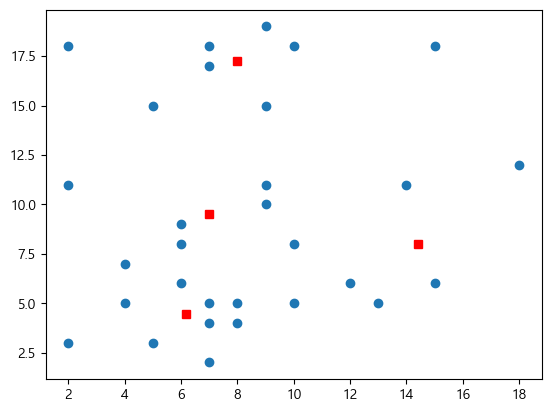

In [11]:
plt.scatter( df['x'], df['y'])
for x,y in km.cluster_centers_:
    plt.plot( x,y, 'rs')
plt.show()

In [12]:
km.labels_

array([1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1,
       0, 2, 3, 3, 3, 3, 2, 3], dtype=int32)

In [14]:
df['cluster'] = km.labels_

In [15]:
df

,x,y,cluster
0,2,3,1
1,2,11,0
2,2,18,2
3,4,5,1
4,4,7,1
5,5,3,1
6,5,15,2
7,6,6,1
8,6,8,0
9,6,9,0


In [16]:
import seaborn as sb

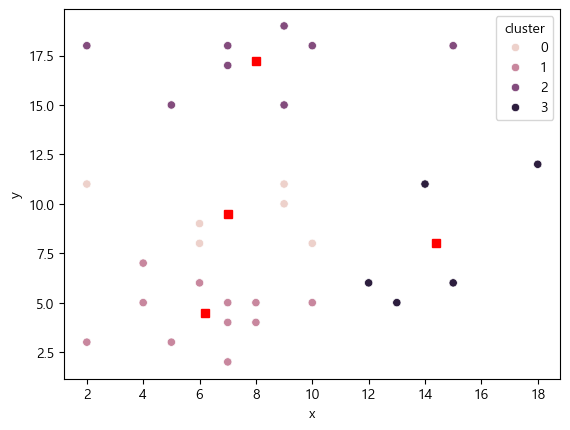

In [19]:
# sb.pairplot(df, hue='cluster')
sb.scatterplot(df, x="x",y='y', hue='cluster')
for x,y in km.cluster_centers_:
    plt.plot( x,y, 'rs')
plt.show()

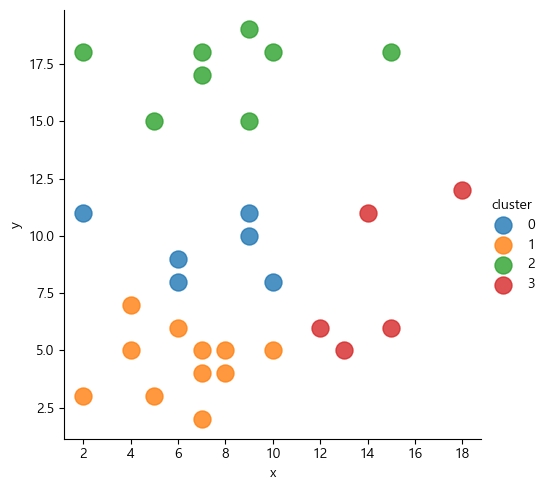

In [21]:
sb.lmplot( data=df, x='x', y='y', hue='cluster', fit_reg=False,
          scatter_kws={'s':150} )
plt.show()

In [22]:
km.inertia_

306.56363636363636

### 각센터를 중심으로 떨어진 거리의 총합의 평균

In [24]:
df.drop( columns=['cluster'], inplace=True)

In [25]:
df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


In [26]:
mylist =[]
for n in range( 1, 10):
    model = KMeans( n_clusters=n)
    km = model.fit( df )
    mylist.append( km.inertia_ )

In [27]:
mylist

[1324.2666666666669,
 668.5079365079365,
 530.1282828282829,
 342.58888888888885,
 240.0,
 206.43571428571428,
 187.1969696969697,
 137.63095238095238,
 102.94761904761904]

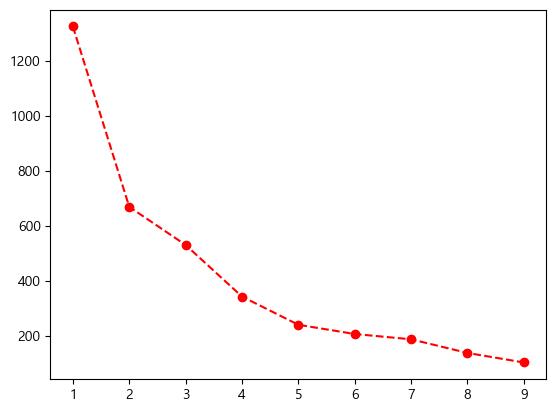

In [28]:
plt.plot( range(1,10), mylist, 'ro--')
plt.show()